In [1]:
# Libraries
from scipy import stats
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


# Data exploration

In [2]:
stud = pd.read_csv('stud_math.csv')

In [3]:
def get_boxplot(col):  # function which draws boxplot
    fig, ax = plt.subplots(figsize=(14, 5))
    sns.boxplot(x=col, y='score',
                data=stud,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)


def get_stat_dif(column):  # function which get statistic significant values
    cols = stud[column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def nan_to_m(df):  # convert None values to mean if variable type is quantitative and to mode if qualitative
    for column in df.columns:
        if (df[column].dtype == np.float64) | (df[column].dtype == np.int64):
            df[column] = df[column].fillna(round(df[column].mean()))
        elif (df[column].dtype == np.object):
            df[column] = df[column].fillna(df[column].mode()[0])

In [4]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

 So there are 13 numerical variables and 17 categorial. And some missing values.

In [5]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


On the cell above we can see that columns 'Fedu' and 'famrel' has incorrect data. 

In [6]:
# Lets replace the values of the variables to the correct ones

stud.loc[stud.Fedu == 40.0, 'Fedu'] = 4.0
stud.loc[stud.famrel == -1.0, 'famrel'] = round(stud.famrel.mean())

In [20]:
# Converting NaN into mean and mode

nan_to_m(stud)
stud.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,...,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,...,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<AxesSubplot:xlabel='absences', ylabel='Count'>

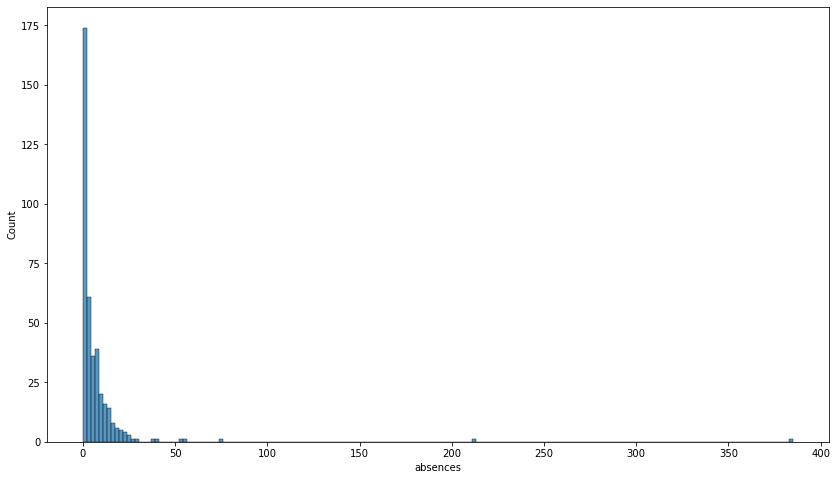

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(stud.absences)

On the histogram we can see that column 'absences' has some extra high outliers. Lets remove all rows where standard deviations is more than 3 in column 'absences'.

In [9]:
stud = stud[(np.abs(stats.zscore(stud.absences)) < 3)]

count    393.000000
mean      52.193384
std       22.738717
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

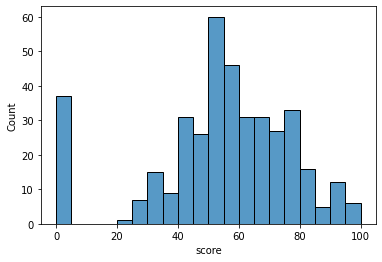

In [10]:
sns.histplot(stud.score, bins = 20)
stud.score.describe()

This hist shows us that a big amount(>30) of students got 0 scores in math. And at the same time, no one got less than 20 scores. It means, that, most likely, 0 scores got only those students, who didn't come to the exam. So rows with 'score' = 0 must be removed.

count    356.000000
mean      57.617978
std       16.046942
min       20.000000
25%       48.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

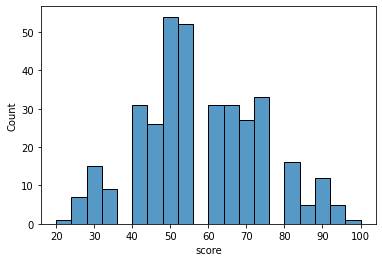

In [11]:
stud.score = stud.loc[stud.score >= 20.0, 'score']
stud = stud.dropna()
sns.histplot(stud.score, bins = 20)
stud.score.describe()

Now 'score' has normal distribution

In [12]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

'studytime' and 'studytime_granular' has almost similar name. Let's make scatterplot to see it's correlation 

Text(0, 0.5, 'studytime_granular')

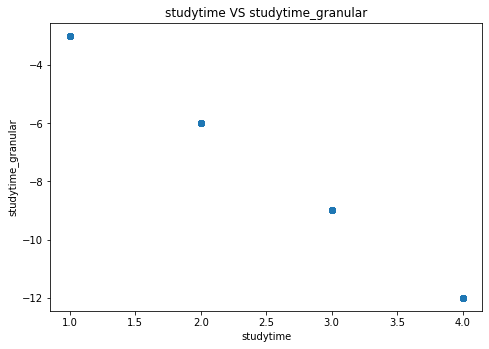

In [13]:
stud = stud.rename(columns={'studytime, granular': 'studytime_granular'})

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=stud['studytime'], y=stud['studytime_granular'], marker='o')
axes.set_title('studytime VS studytime_granular')
axes.set_xlabel('studytime')
axes.set_ylabel('studytime_granular')

'studytime' and 'studytime_granular' has the same count of values and negative correlation. Lets drop 'studytime_granular' because of useless values.

In [14]:
stud.drop(['studytime_granular'], inplace=True, axis=1)

In [22]:
pd.DataFrame(stud.school.value_counts())

,school
GP,315
MS,41


Here we can see that only 2 schools took part in reserch.

<AxesSubplot:>

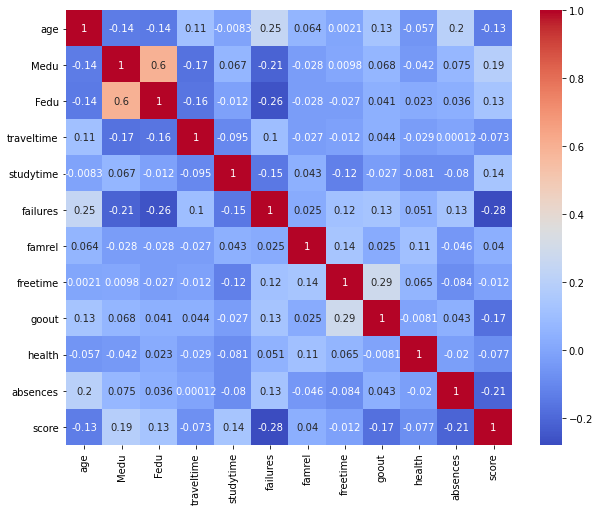

In [16]:
correlation = stud.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

So here we can see that 'score' has negative weak correlation with 'Age', 'failures', 'goout', 'absences' and positive weak correlation with 'Medu', 'Fedu', 'studytime'.

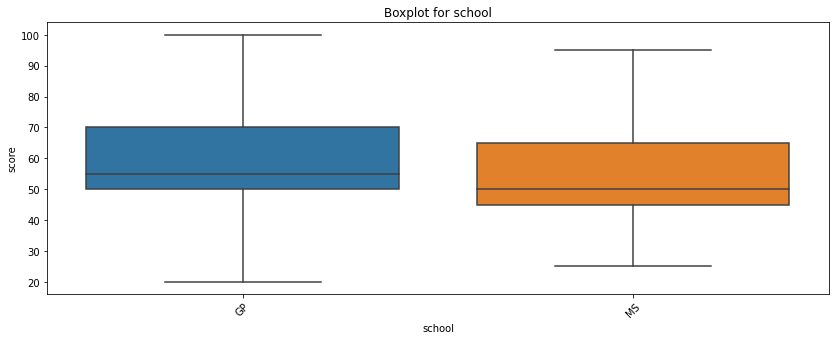

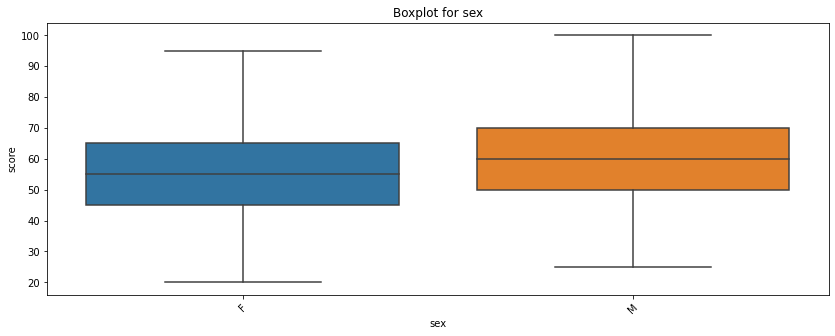

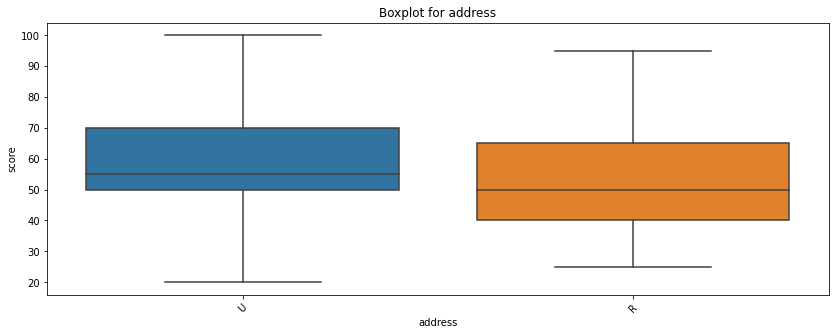

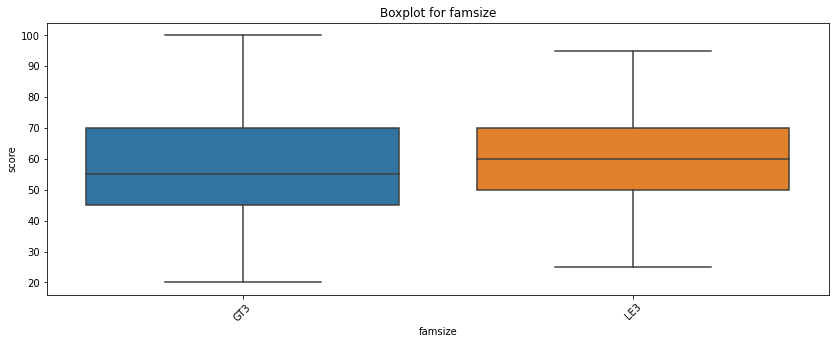

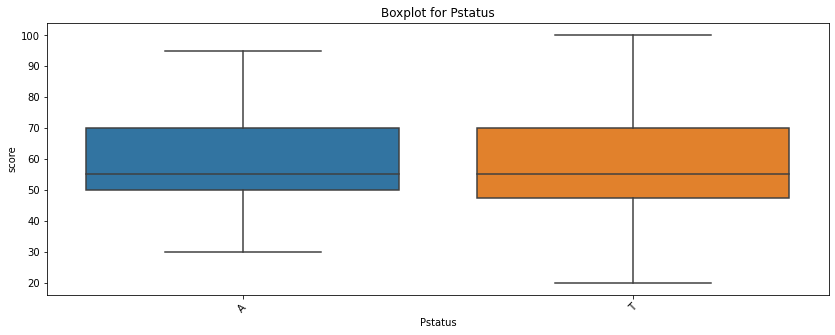

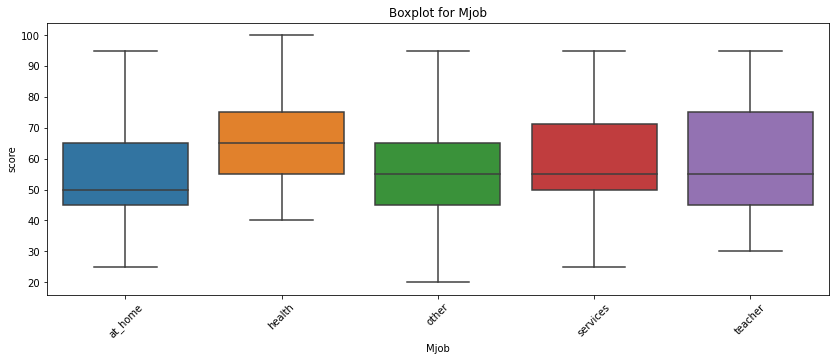

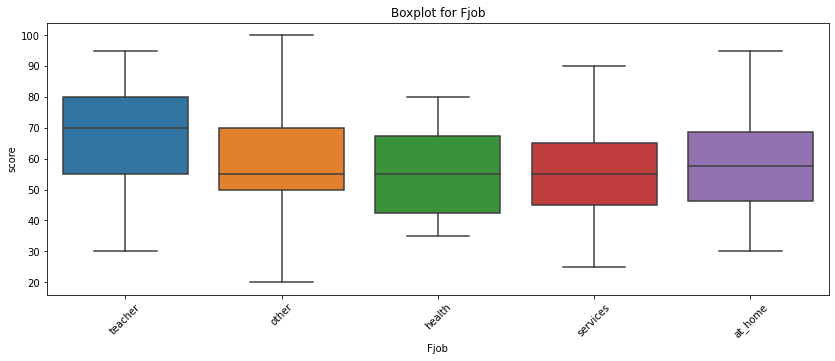

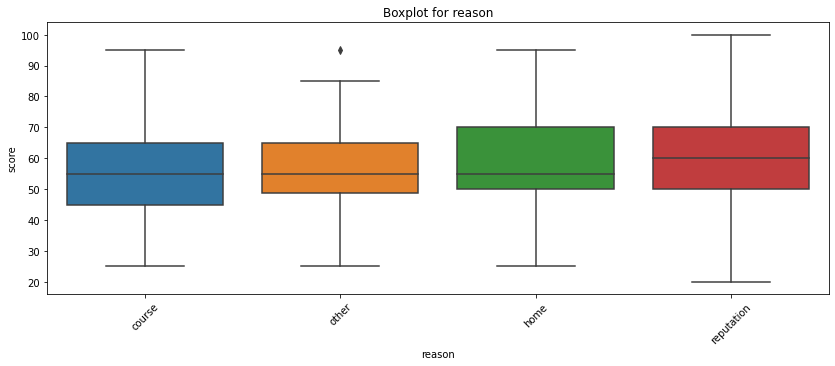

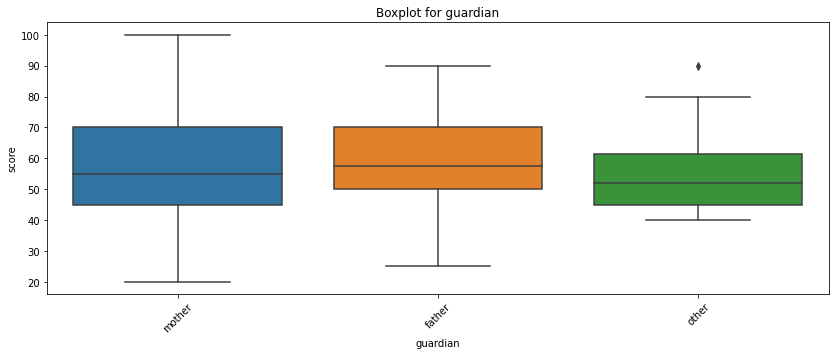

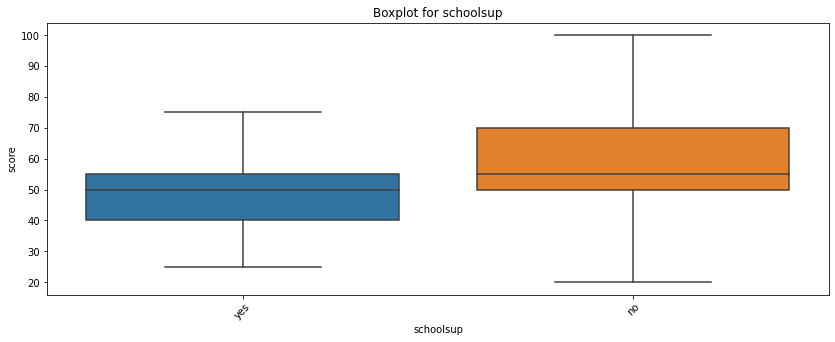

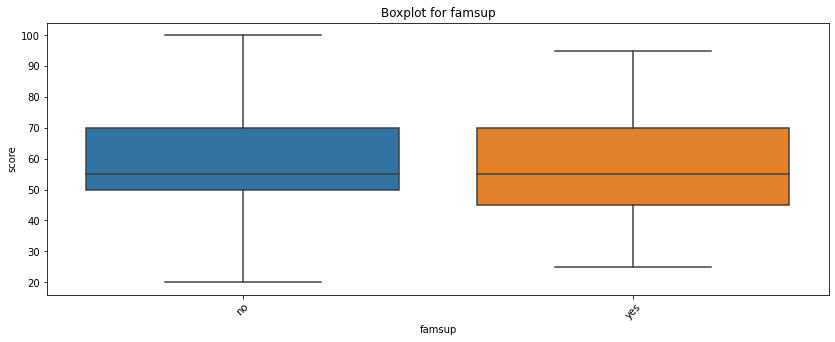

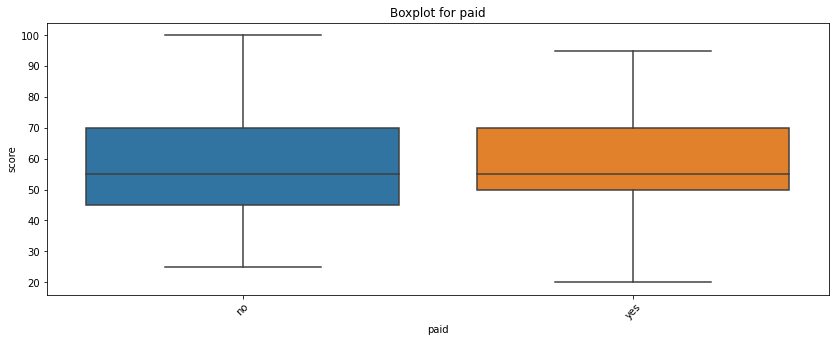

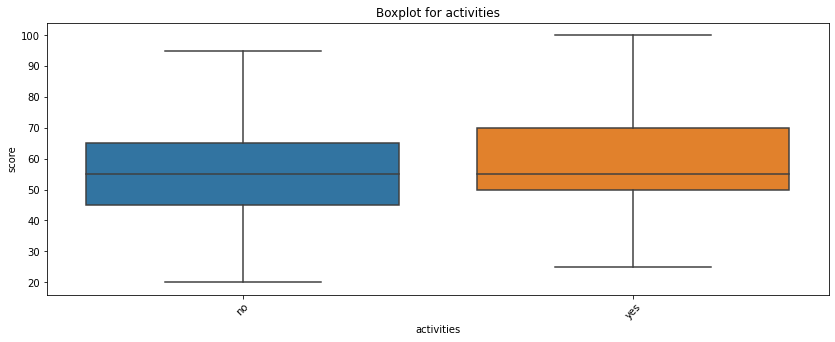

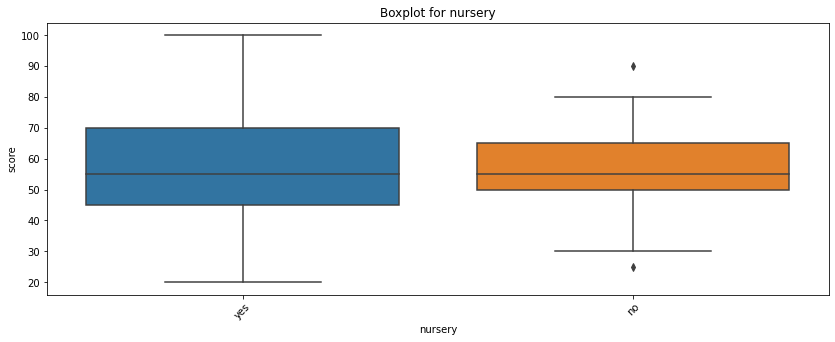

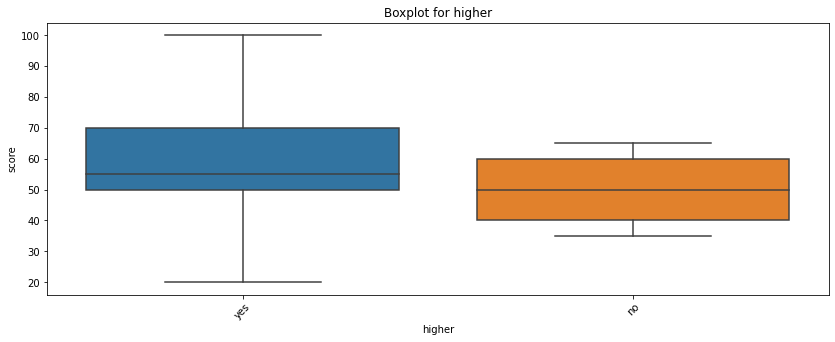

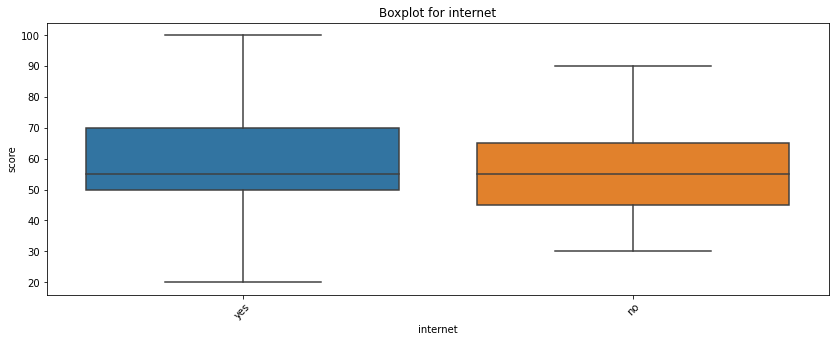

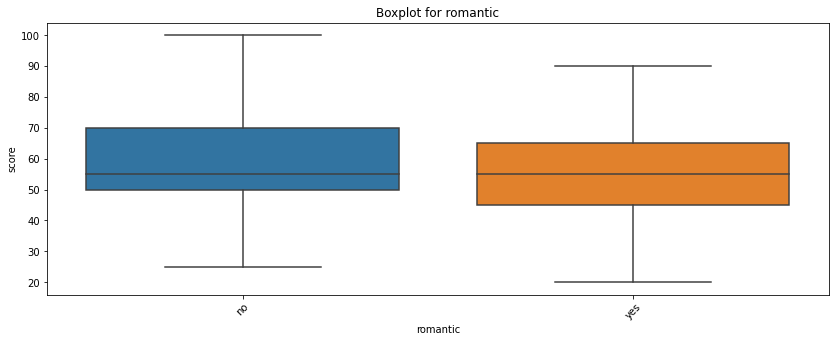

In [17]:
for col in list(stud.select_dtypes(include=['object']).columns):
    get_boxplot(col)

On the boxplots we see alot of potenсially statistically significant values, but lets check them via student's t-test.

In [18]:
for col in list(stud.select_dtypes(include=['object']).columns):
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


So, 'sex', 'address', 'Mjob', 'Fjob', 'schoolsup' has statistically significant differences. 

In [19]:
stud_for_model = stud.reindex(columns=['sex', 'address', 'Mjob', 'Fjob', 'schoolsup', 'age',
                                       'failures', 'goout', 'absences', 'Medu', 'Fedu', 'studytime',
                                       'score'])
stud_for_model.head(10)

,sex,address,Mjob,Fjob,schoolsup,age,failures,goout,absences,Medu,Fedu,studytime,score
0,F,U,at_home,teacher,yes,18,0.0,4.0,6.0,4.0,4.0,2.0,30.0
1,F,U,at_home,other,no,17,0.0,3.0,4.0,1.0,1.0,2.0,30.0
2,F,U,at_home,other,yes,15,3.0,2.0,10.0,1.0,1.0,2.0,50.0
3,F,U,health,other,no,15,0.0,2.0,2.0,4.0,2.0,3.0,75.0
4,F,U,other,other,no,16,0.0,2.0,4.0,3.0,3.0,2.0,50.0
5,M,U,services,other,no,16,0.0,2.0,10.0,4.0,3.0,2.0,75.0
6,M,U,other,other,no,16,0.0,4.0,0.0,2.0,2.0,2.0,55.0
7,F,U,other,teacher,yes,17,0.0,4.0,6.0,4.0,4.0,2.0,30.0
8,M,U,services,other,no,15,0.0,2.0,0.0,3.0,2.0,2.0,95.0
9,M,U,other,other,no,15,0.0,1.0,0.0,3.0,4.0,2.0,75.0


## The EDA result of the impact of the living conditions of students aged 15 to 22 on their math performance in order to identify students at an early stage at risk:
   ### • Data has low amount of NaN values.
   ### • Outliers was found in 'Fedu' and 'famrel' columns. It means that data is clean enough.
   ### • Positive correlation between 'Medu'/'Fedu' and 'score' may indicate that students who have higher score also have educated parents.
   ###   Positive correlation between 'studytime' and 'score' may indicate that the more time student spends his/her time on studing, the more score he/she gains  on the exam.
   ###   Negative correlatioin between 'Age', 'failures', 'goout', 'absences' and 'score' also may indicate that this parameters may be used in building of predictive model.
   ###   Qualitative variables 'sex', 'address', 'Mjob', 'Fjob', 'schoolsup' has statistically significant differences to 'score' and also may be used in building of predictive model.